<a href="https://colab.research.google.com/github/JamesCFabrianes/Google-Collab-Python-/blob/main/B64_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical -> Agglomerative

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Buat generate data Dummy
from sklearn.cluster import AgglomerativeClustering # Agglomerative Clustering

In [ ]:
# Generate data Dummy

X, _ = make_classification(n_samples = 1000, # akan dibuat 1000 data
                           n_features = 2, # 2 karena untuk sumbu x dan y
                           n_redundant = 0,
                           random_state  = 2023)

In [ ]:
X

array([[ 1.63875805, -2.12994195],
       [-0.71783258,  0.59449997],
       [ 0.03019958, -1.08524113],
       ...,
       [-1.48657992, -0.17949376],
       [ 1.43403615,  0.81862226],
       [-0.15690578, -1.51684957]])

In [ ]:
# Membuat model cluster
model = AgglomerativeClustering(n_clusters = 2)

In [ ]:
y_pred = model.fit_predict(X)

In [ ]:
# Cluster yang unik
clusters = np.unique(y_pred)
clusters

array([0, 1])

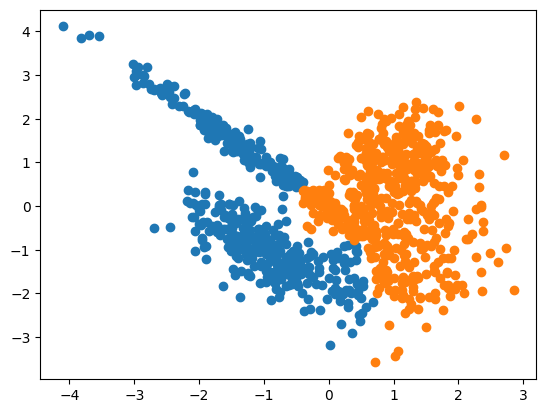

In [ ]:
for c in clusters:
    row_index = np.where(y_pred == c) # Menampung data baris yang sesuai dengan clusternya
    plt.scatter(x = X[row_index, 0],
                y = X[row_index, 1])

plt.show()

# K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_KMeans, _ = make_classification(n_samples = 2000,
                                  n_features = 2,
                                  n_redundant = 0,
                                  random_state = 2023)

In [ ]:
model_KMeans = KMeans(n_clusters=3,
                      random_state  = 2023)

model_KMeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2023)

In [ ]:
#Centroid
centers = model_KMeans.cluster_centers_
centers

array([[ 1.04320471,  0.78205881],
       [ 0.0427995 , -1.20616216],
       [-1.55854789,  1.06671886]])

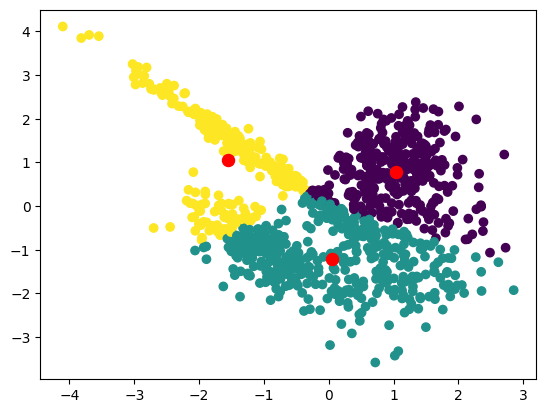

In [ ]:
output = plt.scatter(X[:, 0],
                     X[:, 1],
                     c = model_KMeans.labels_)

plt.scatter(centers[:, 0],
            centers[:, 1],
            c="red",
            s = 75)

plt.show()

# Wine Clustering Cases

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Wine.csv")

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
data = df[["Alcohol", "Color_Intensity"]]
data.sample(5)

,Alcohol,Color_Intensity
110,11.46,2.90
137,12.53,5.00
107,12.72,3.30
94,11.62,3.25
54,13.74,5.85


# Hierarchical Clustering -> Agglomerative

In [ ]:
model = AgglomerativeClustering(n_clusters = 3)

wine_pred = model.fit_predict(data)

In [ ]:
cluster_wine = np.unique(wine_pred)
cluster_wine

array([0, 1, 2])

(array([  3,   5,   9,  14,  15,  16,  17,  18,  31,  48,  49,  50,  52,
        56,  58, 135, 144, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 164, 165, 166, 167, 168, 169, 171, 172,
       173, 174, 175, 176, 177]),) 1
(array([  0,   1,   2,   4,   6,   7,   8,  10,  11,  12,  13,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        51,  53,  54,  55,  57,  61,  62,  63,  65,  66,  67,  68,  71,
        72,  76,  81,  83,  98, 121, 130, 131, 132, 133, 134, 137, 138,
       139, 140, 141, 142, 143, 145, 146, 161, 162, 163, 170]),) 1
(array([ 59,  60,  64,  69,  70,  73,  74,  75,  77,  78,  79,  80,  82,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124,
       125, 126, 127, 128, 12

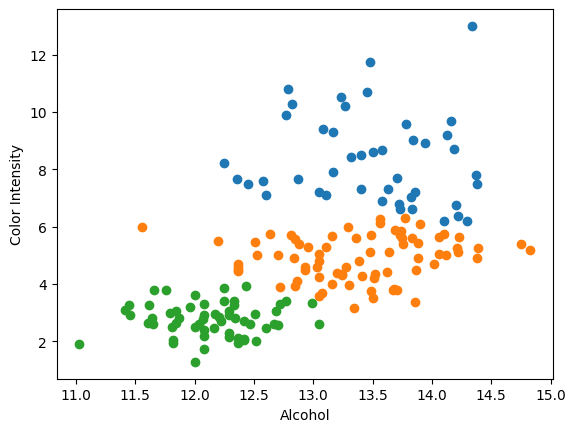

In [ ]:
df_array = np.array(data)

for c in cluster_wine:
    row_index = np.where(wine_pred==c)

    plt.scatter(df_array[row_index, 0],
                df_array[row_index, 1])

plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")

plt.show()

In [ ]:
df_array[3, 0], df_array[3, 1]

(14.37, 7.8)

In [ ]:
data["Cluster"] = wine_pred

<ipython-input-38-25cbd52aae0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cluster"] = wine_pred


In [ ]:
data["Cluster"].value_counts()

1    76
2    58
0    44
Name: Cluster, dtype: int64

In [ ]:
round(data["Cluster"].value_counts() / data.shape[0] * 100, 2)

1    42.70
2    32.58
0    24.72
Name: Cluster, dtype: float64